In [ ]:
print('Hare Krishna')
!pip install qiskit
from qiskit import QuantumCircuit, execute
from qiskit.quantum_info import state_fidelity
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere
from qiskit import BasicAer

import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
print('Hare Rama Hare Krishna')

Hare Rama Hare Krishna


# **PS2 Q2 (a)**
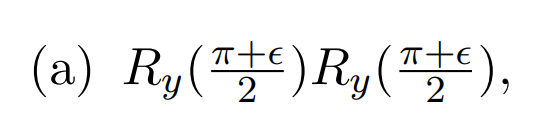

epsilon	     |ψa>f		     |ψ>f		  Fidelity
---------------------------------------------------------------------
-0.10	0.0998+0.0000j		0.0000+0.0000j		0.9900332889
-0.09	0.0899+0.0000j		0.0000+0.0000j		0.9919218464
-0.08	0.0799+0.0000j		0.0000+0.0000j		0.9936136417
-0.07	0.0699+0.0000j		0.0000+0.0000j		0.9951079981
-0.06	0.0600+0.0000j		0.0000+0.0000j		0.9964043179
-0.05	0.0500+0.0000j		0.0000+0.0000j		0.9975020826
-0.04	0.0400+0.0000j		0.0000+0.0000j		0.9984008532
-0.03	0.0300+0.0000j		0.0000+0.0000j		0.9991002700
-0.02	0.0200+0.0000j		0.0000+0.0000j		0.9996000533
-0.01	0.0100+0.0000j		0.0000+0.0000j		0.9999000033
0.00	0.0000+0.0000j		0.0000+0.0000j		1.0000000000
0.01	-0.0100+0.0000j		0.0000+0.0000j		0.9999000033
0.02	-0.0200-0.0000j		0.0000+0.0000j		0.9996000533
0.03	-0.0300-0.0000j		0.0000+0.0000j		0.9991002700
0.04	-0.0400-0.0000j		0.0000+0.0000j		0.9984008532
0.05	-0.0500-0.0000j		0.0000+0.0000j		0.9975020826
0.06	-0.0600-0.0000j		0.0000+0.0000j		0.9964043179
0.07	-0.0699-0.0000j		

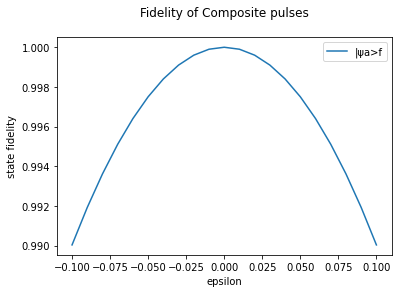

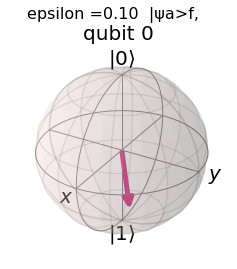

In [ ]:
#PS2 Q2 (a)
n = 1
divisor = 100
fidel_list = []
eps_list = []
fidel_psi_a_list = []
fidel_psi_b_list = []

qc1 = QuantumCircuit(n)
qc2 = QuantumCircuit(n)


print("epsilon\t     |ψa>f\t\t     |ψ>f\t\t  Fidelity")
print("---------------------------------------------------------------------")

for eps in range(-10, 11):
  eps = eps / divisor

  #initialise
  qc1.initialize(0, 0)
  qc2.initialize(0, 0)

  #Ry(pi/2 + eps)Ry(pi/2 + eps)
  qc1.ry(math.pi / 2 + eps, 0)
  qc1.ry(math.pi / 2 + eps, 0)

  #Ry(pi)
  qc2.ry(math.pi, 0)
  
  #IBMQ simulation
  backend = BasicAer.get_backend('statevector_simulator')
  qc_state1_a = execute(qc1, backend).result().get_statevector(qc1)
  qc_state2_a = execute(qc2, backend).result().get_statevector(qc2)

  #fidelity
  f = state_fidelity(qc_state1_a, qc_state2_a, validate=True)
  fidel_list.append(f)
  eps_list.append(eps)
  
  #output
  print("{:0.2f}".format(eps) + "\t{0:.4f}\t\t{1:.4f}\t\t".format(qc_state1_a[0], qc_state2_a[0]) + "{:0.10f}".format(f))

fidel_psi_a_list = fidel_list.copy()
fidl_psi_af = fidel_list.pop(-1)
eps_last = eps_list.pop(-1)
fidel_list.append(fidl_psi_af)
eps_list.append(eps_last)
print("---------------------------------------------------------------------")
print("fidelity between |ψa>f and |ψ>f for epsilon {:0.2f} is {:0.10f}\n".format(eps_list.pop(-1), fidel_list.pop(-1)) )
fidel_list.append(fidl_psi_af)
eps_list.append(eps_last)

plt.plot(eps_list, fidel_list)
plt.title('Fidelity of Composite pulses\n')
plt.xlabel('epsilon')
plt.ylabel('state fidelity')
plt.legend(["|ψa>f"])
plt.show()

plot_bloch_multivector(qc_state1_a, title='epsilon ={:0.2f}  |ψa>f, '.format(eps_last))



---

---



# **PS2 Q2 (b)**
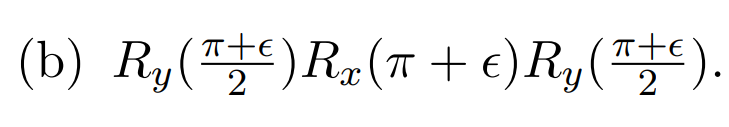

epsilon	     |ψb>f		     |ψ>f		  Fidelity
---------------------------------------------------------------------
-0.10	0.0025+0.0000j		0.0000+0.0000j		0.9999937604
-0.09	0.0001-0.0020j		0.0000+0.0000j		0.9999959049
-0.08	-0.0016-0.0002j		0.0000+0.0000j		0.9999974427
-0.07	-0.0002+0.0012j		0.0000+0.0000j		0.9999985006
-0.06	0.0009+0.0002j		0.0000+0.0000j		0.9999991905
-0.05	0.0001-0.0006j		0.0000+0.0000j		0.9999996095
-0.04	-0.0004-0.0001j		0.0000+0.0000j		0.9999998400
-0.03	-0.0001+0.0002j		0.0000+0.0000j		0.9999999494
-0.02	0.0001+0.0000j		0.0000+0.0000j		0.9999999900
-0.01	0.0000-0.0000j		0.0000+0.0000j		0.9999999994
0.00	0.0000+0.0000j		0.0000+0.0000j		1.0000000000
0.01	-0.0000+0.0000j		0.0000+0.0000j		0.9999999994
0.02	0.0001+0.0000j		0.0000+0.0000j		0.9999999900
0.03	0.0001-0.0002j		0.0000+0.0000j		0.9999999494
0.04	-0.0004-0.0001j		0.0000+0.0000j		0.9999998400
0.05	-0.0001+0.0006j		0.0000+0.0000j		0.9999996095
0.06	0.0009+0.0002j		0.0000+0.0000j		0.9999991905
0.07	0.0002-0.0012j		

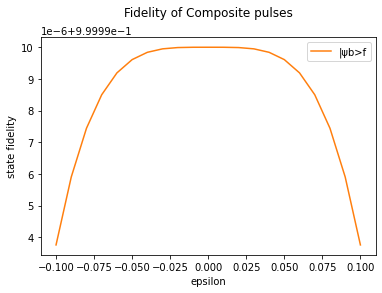

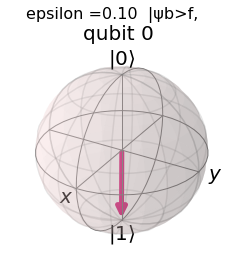

In [ ]:
fidel_list.clear()
eps_list.clear()

print("epsilon\t     |ψb>f\t\t     |ψ>f\t\t  Fidelity")
print("---------------------------------------------------------------------")

for eps in range(-10, 11):
  eps = eps/divisor

  #initialise
  qc1.initialize(0, 0)
  qc2.initialize(0, 0)

  #Ry(pi/2 + eps) Rx(pi + eps) Ry(pi/2 + eps)
  qc1.ry((math.pi + eps)/2, 0)
  qc1.rx((math.pi + eps), 0)
  qc1.ry((math.pi + eps)/2, 0)


  #Ry(pi)
  qc2.ry(math.pi, 0)
  
  #IBMQ simulation
  backend = BasicAer.get_backend('statevector_simulator')
  qc_state1_b = execute(qc1, backend).result().get_statevector(qc1)
  qc_state2_b = execute(qc2, backend).result().get_statevector(qc2)

  #fidelity
  f = state_fidelity(qc_state1_b, qc_state2_b, validate=True)
  fidel_list.append(f)
  eps_list.append(eps)

  #output
  print("{:0.2f}".format(eps) + "\t{0:.4f}\t\t{1:.4f}\t\t".format(qc_state1_b[0], qc_state2_b[0]) + "{:0.10f}".format(f))


fidel_psi_b_list = fidel_list.copy()
fidl_psi_bf = fidel_list.pop(-1)
eps_last = eps_list.pop(-1)

fidel_list.append(fidl_psi_bf)
eps_list.append(eps_last)

print("---------------------------------------------------------------------")
print("\nfidelity between |ψb>f and |ψ>f for epsilon {:0.2f} is {:0.10f}".format(eps_list.pop(-1), fidel_list.pop(-1)) )

fidel_list.append(fidl_psi_bf)
eps_list.append(eps_last)

#plot
plt.plot(eps_list, fidel_list, color='#ff7f0e')

plt.title('Fidelity of Composite pulses\n')
plt.xlabel('epsilon')
plt.ylabel('state fidelity')
plt.legend(["|ψb>f"])
plt.show()

plot_bloch_multivector(qc_state1_b, title='epsilon ={:0.2f}  |ψb>f, '.format(eps))

# **Plotting the fidelity between |ψa>f and |ψ>f and the fidelity between |ψb>f and |ψ>f**

------------------------------------------------------
		Fidelity Comparison
epsilon	   |ψb>f	  |ψa>f		 |ψb>f - |ψa>f
------------------------------------------------------
-0.10	0.99999376	0.99003329	0.00996047
-0.09	0.99999590	0.99192185	0.00807406
-0.08	0.99999744	0.99361364	0.00638380
-0.07	0.99999850	0.99510800	0.00489050
-0.06	0.99999919	0.99640432	0.00359487
-0.05	0.99999961	0.99750208	0.00249753
-0.04	0.99999984	0.99840085	0.00159899
-0.03	0.99999995	0.99910027	0.00089968
-0.02	0.99999999	0.99960005	0.00039994
-0.01	1.00000000	0.99990000	0.00010000
0.00	1.00000000	1.00000000	0.00000000
0.01	1.00000000	0.99990000	0.00010000
0.02	0.99999999	0.99960005	0.00039994
0.03	0.99999995	0.99910027	0.00089968
0.04	0.99999984	0.99840085	0.00159899
0.05	0.99999961	0.99750208	0.00249753
0.06	0.99999919	0.99640432	0.00359487
0.07	0.99999850	0.99510800	0.00489050
0.08	0.99999744	0.99361364	0.00638380
0.09	0.99999590	0.99192185	0.00807406
------------------------------------------------------



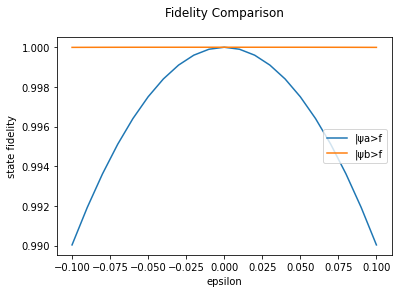

In [ ]:
print("------------------------------------------------------")
print("\t\tFidelity Comparison")
print("epsilon\t   |ψb>f\t  |ψa>f\t\t |ψb>f - |ψa>f")
print("------------------------------------------------------")
for each in range(len(fidel_psi_a_list) - 1):
  print("{:0.2f}\t{:1.8f}\t{:1.8f}\t{:1.8f}".format(eps_list[each], fidel_psi_b_list[each], fidel_psi_a_list[each], abs(fidel_psi_b_list[each] - fidel_psi_a_list[each])))
print("------------------------------------------------------\n")


#plot
plt.plot(eps_list, fidel_psi_a_list)
plt.plot(eps_list, fidel_psi_b_list)
plt.title('Fidelity Comparison\n')
plt.xlabel('epsilon')
plt.ylabel('state fidelity')
plt.legend(["|ψa>f", "|ψb>f"], loc = 7)
plt.show()

# Bloch sphere comparison 

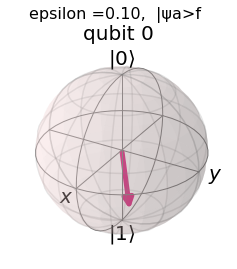

In [ ]:
#print("\nBloch sphere comparison")
plot_bloch_multivector(qc_state1_a, title='epsilon ={:0.2f},  |ψa>f'.format(eps_last))

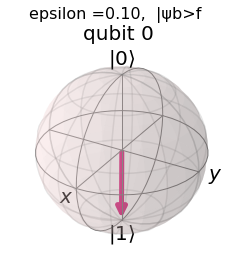

In [ ]:
plot_bloch_multivector(qc_state1_b, title='epsilon ={:0.2f},  |ψb>f'.format(eps_last))

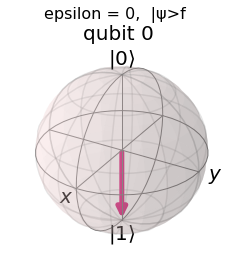

In [ ]:
plot_bloch_multivector(qc_state2_a, title= 'epsilon = 0,  |ψ>f')